In [1]:
%matplotlib inline
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8.0, 10.0)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')

## Speed-Quality Tradeoff##

In [ ]:
'''
Plot average distance to the K nearest neighbors vs search time and mAP vs the search time 
(where search time is measured by number of distance computations), 
by varying the hyper-parameters of your approximate NN algorithm but keeping K fixed.

k=5
K_nb = 10
L=1
r=1
C = pow(2, 32) - 5

cR varying
'''

In [18]:
# data 
cRs = [np.inf, 250, 200, 180, 160, 150, 120, 100, 80, 60]
avg_dists = [161.61468402993356, 156.49816543006827, 148.0139894015403, 141.31611675910858, 131.06741129062954, 124.07248057531012, 94.47766362765303, 65.48847580890326, 32.499925159941924, 8.109599840326913]
search_times = [17.27304487406463, 17.993589743589745, 20.161370047682052, 21.912716110921636, 24.18207340254423, 25.44566019573239, 28.745956650896687, 29.675640250050414, 29.59935102118725, 28.873451327433628]
mAPs = [0.168841438836977, 0.17341121200125567, 0.18111913291361856, 0.1941550499558636, 0.23296815912526314, 0.24182540232474986, 0.2868351267900724, 0.3263943746133957, 0.3353218589444592, 0.33750528954893844]

data_tuple_list = []
for i in range(len(cRs)):
    data_tuple_list.append((cRs[i], avg_dists[i], search_times[i], mAPs[i]))
data_tuple_list.sort(key=lambda tup : tup[2])
data_tuple_list

[(inf, 161.61468402993356, 17.27304487406463, 0.168841438836977),
 (250, 156.49816543006827, 17.993589743589745, 0.17341121200125567),
 (200, 148.0139894015403, 20.161370047682052, 0.18111913291361856),
 (180, 141.31611675910858, 21.912716110921636, 0.1941550499558636),
 (160, 131.06741129062954, 24.18207340254423, 0.23296815912526314),
 (150, 124.07248057531012, 25.44566019573239, 0.24182540232474986),
 (120, 94.47766362765303, 28.745956650896687, 0.2868351267900724),
 (60, 8.109599840326913, 28.873451327433628, 0.33750528954893844),
 (80, 32.499925159941924, 29.59935102118725, 0.3353218589444592),
 (100, 65.48847580890326, 29.675640250050414, 0.3263943746133957)]

In [23]:
# remove extreme data points
# data_tuple_list.pop(7)
data_tuple_list_1 = data_tuple_list[:]
data_tuple_list_1.pop(7)
data_tuple_list_1.pop(7)
data_tuple_list_1

[(inf, 161.61468402993356, 17.27304487406463, 0.168841438836977),
 (250, 156.49816543006827, 17.993589743589745, 0.17341121200125567),
 (200, 148.0139894015403, 20.161370047682052, 0.18111913291361856),
 (180, 141.31611675910858, 21.912716110921636, 0.1941550499558636),
 (160, 131.06741129062954, 24.18207340254423, 0.23296815912526314),
 (150, 124.07248057531012, 25.44566019573239, 0.24182540232474986),
 (120, 94.47766362765303, 28.745956650896687, 0.2868351267900724),
 (100, 65.48847580890326, 29.675640250050414, 0.3263943746133957)]

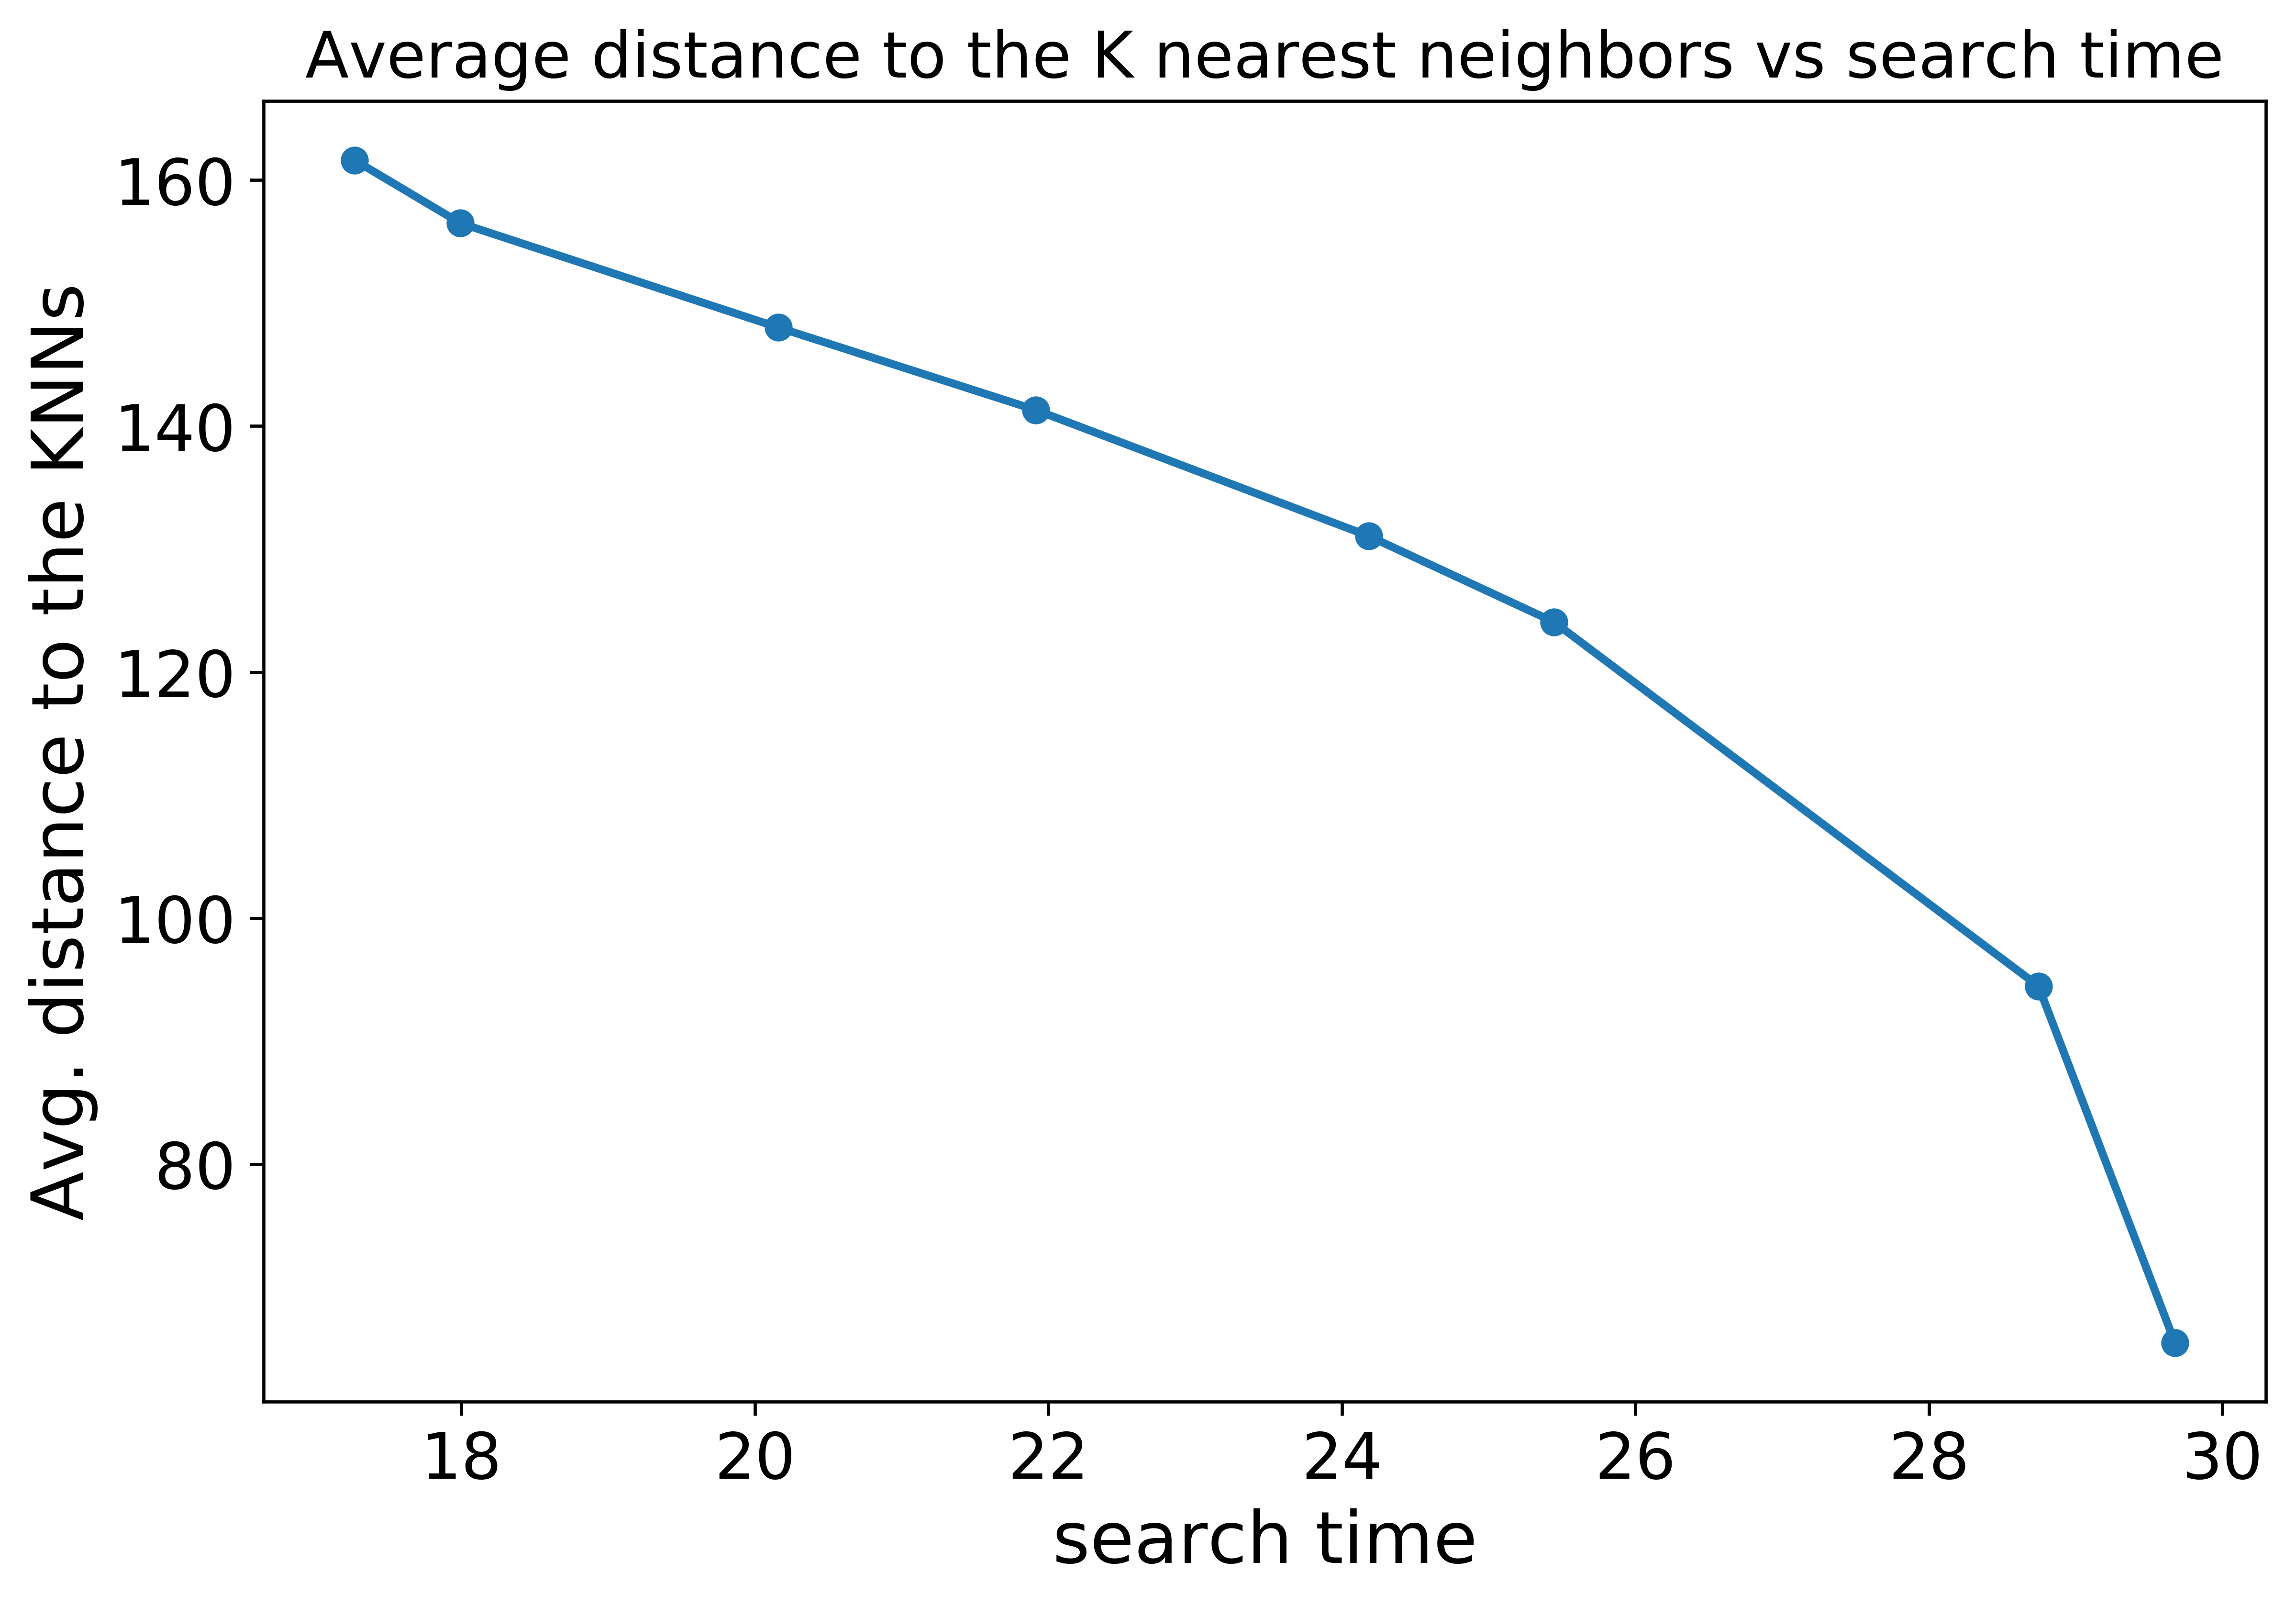

In [31]:
# Plot average distance to the K nearest neighbors vs search time
x_search_time = [tup[2] for tup in data_tuple_list_1]
y_distance = [tup[1] for tup in data_tuple_list_1]

plt.figure(figsize=(9,6),dpi=600)
plt.plot(x_search_time, y_distance, "o-", linewidth = 2)

plt.xlabel("search time", fontsize = 18)
plt.ylabel("Avg. distance to the KNNs", fontsize = 18)
plt.title("Average distance to the K nearest neighbors vs search time", fontsize = 16)
# plt.xlim([0.1,3])
# plt.ylim([2,5])
plt.tick_params(axis='both',labelsize=16)

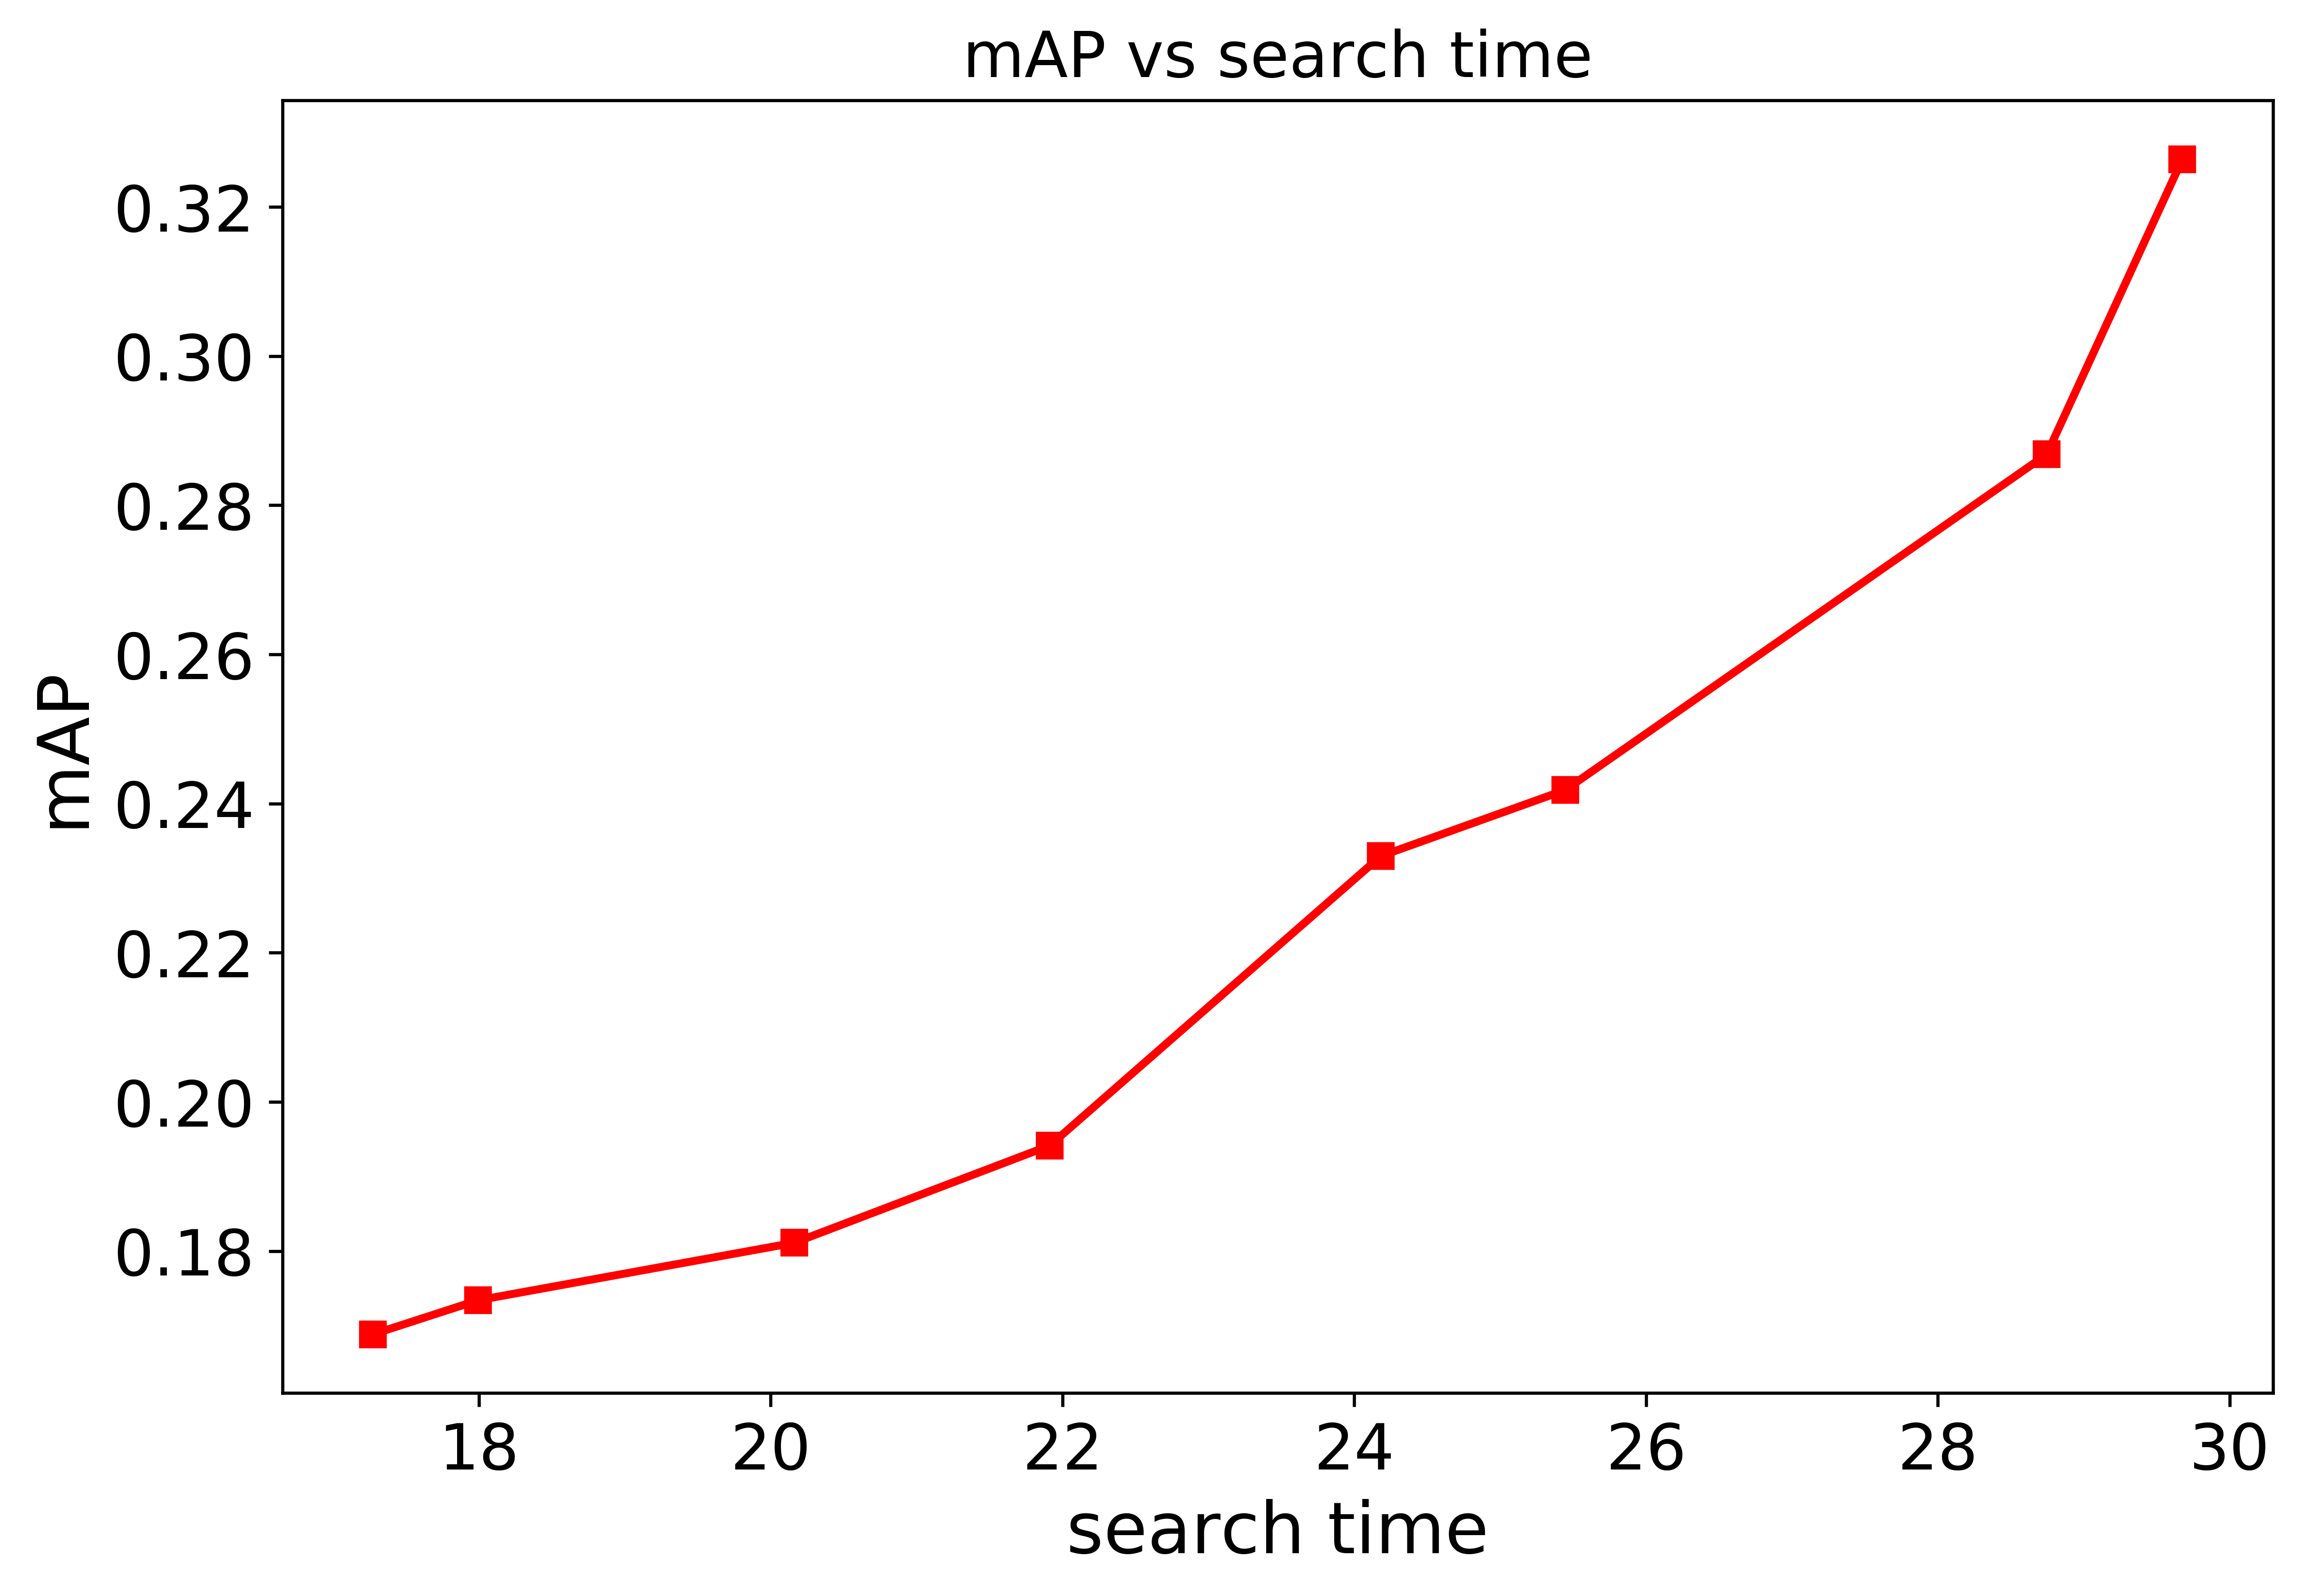

In [38]:
# Plot mAP vs the search time
x_search_time = [tup[2] for tup in data_tuple_list_1]
y_mAP = [tup[-1] for tup in data_tuple_list_1]

plt.figure(figsize=(9,6),dpi=600)
plt.plot(x_search_time, y_mAP, "s-", color= "red" ,linewidth = 2)

plt.xlabel("search time", fontsize = 18)
plt.ylabel("mAP", fontsize = 18)
plt.title("mAP vs search time", fontsize = 16)
# plt.xlim([0.1,3])
# plt.ylim([2,5])
plt.tick_params(axis='both',labelsize=16)

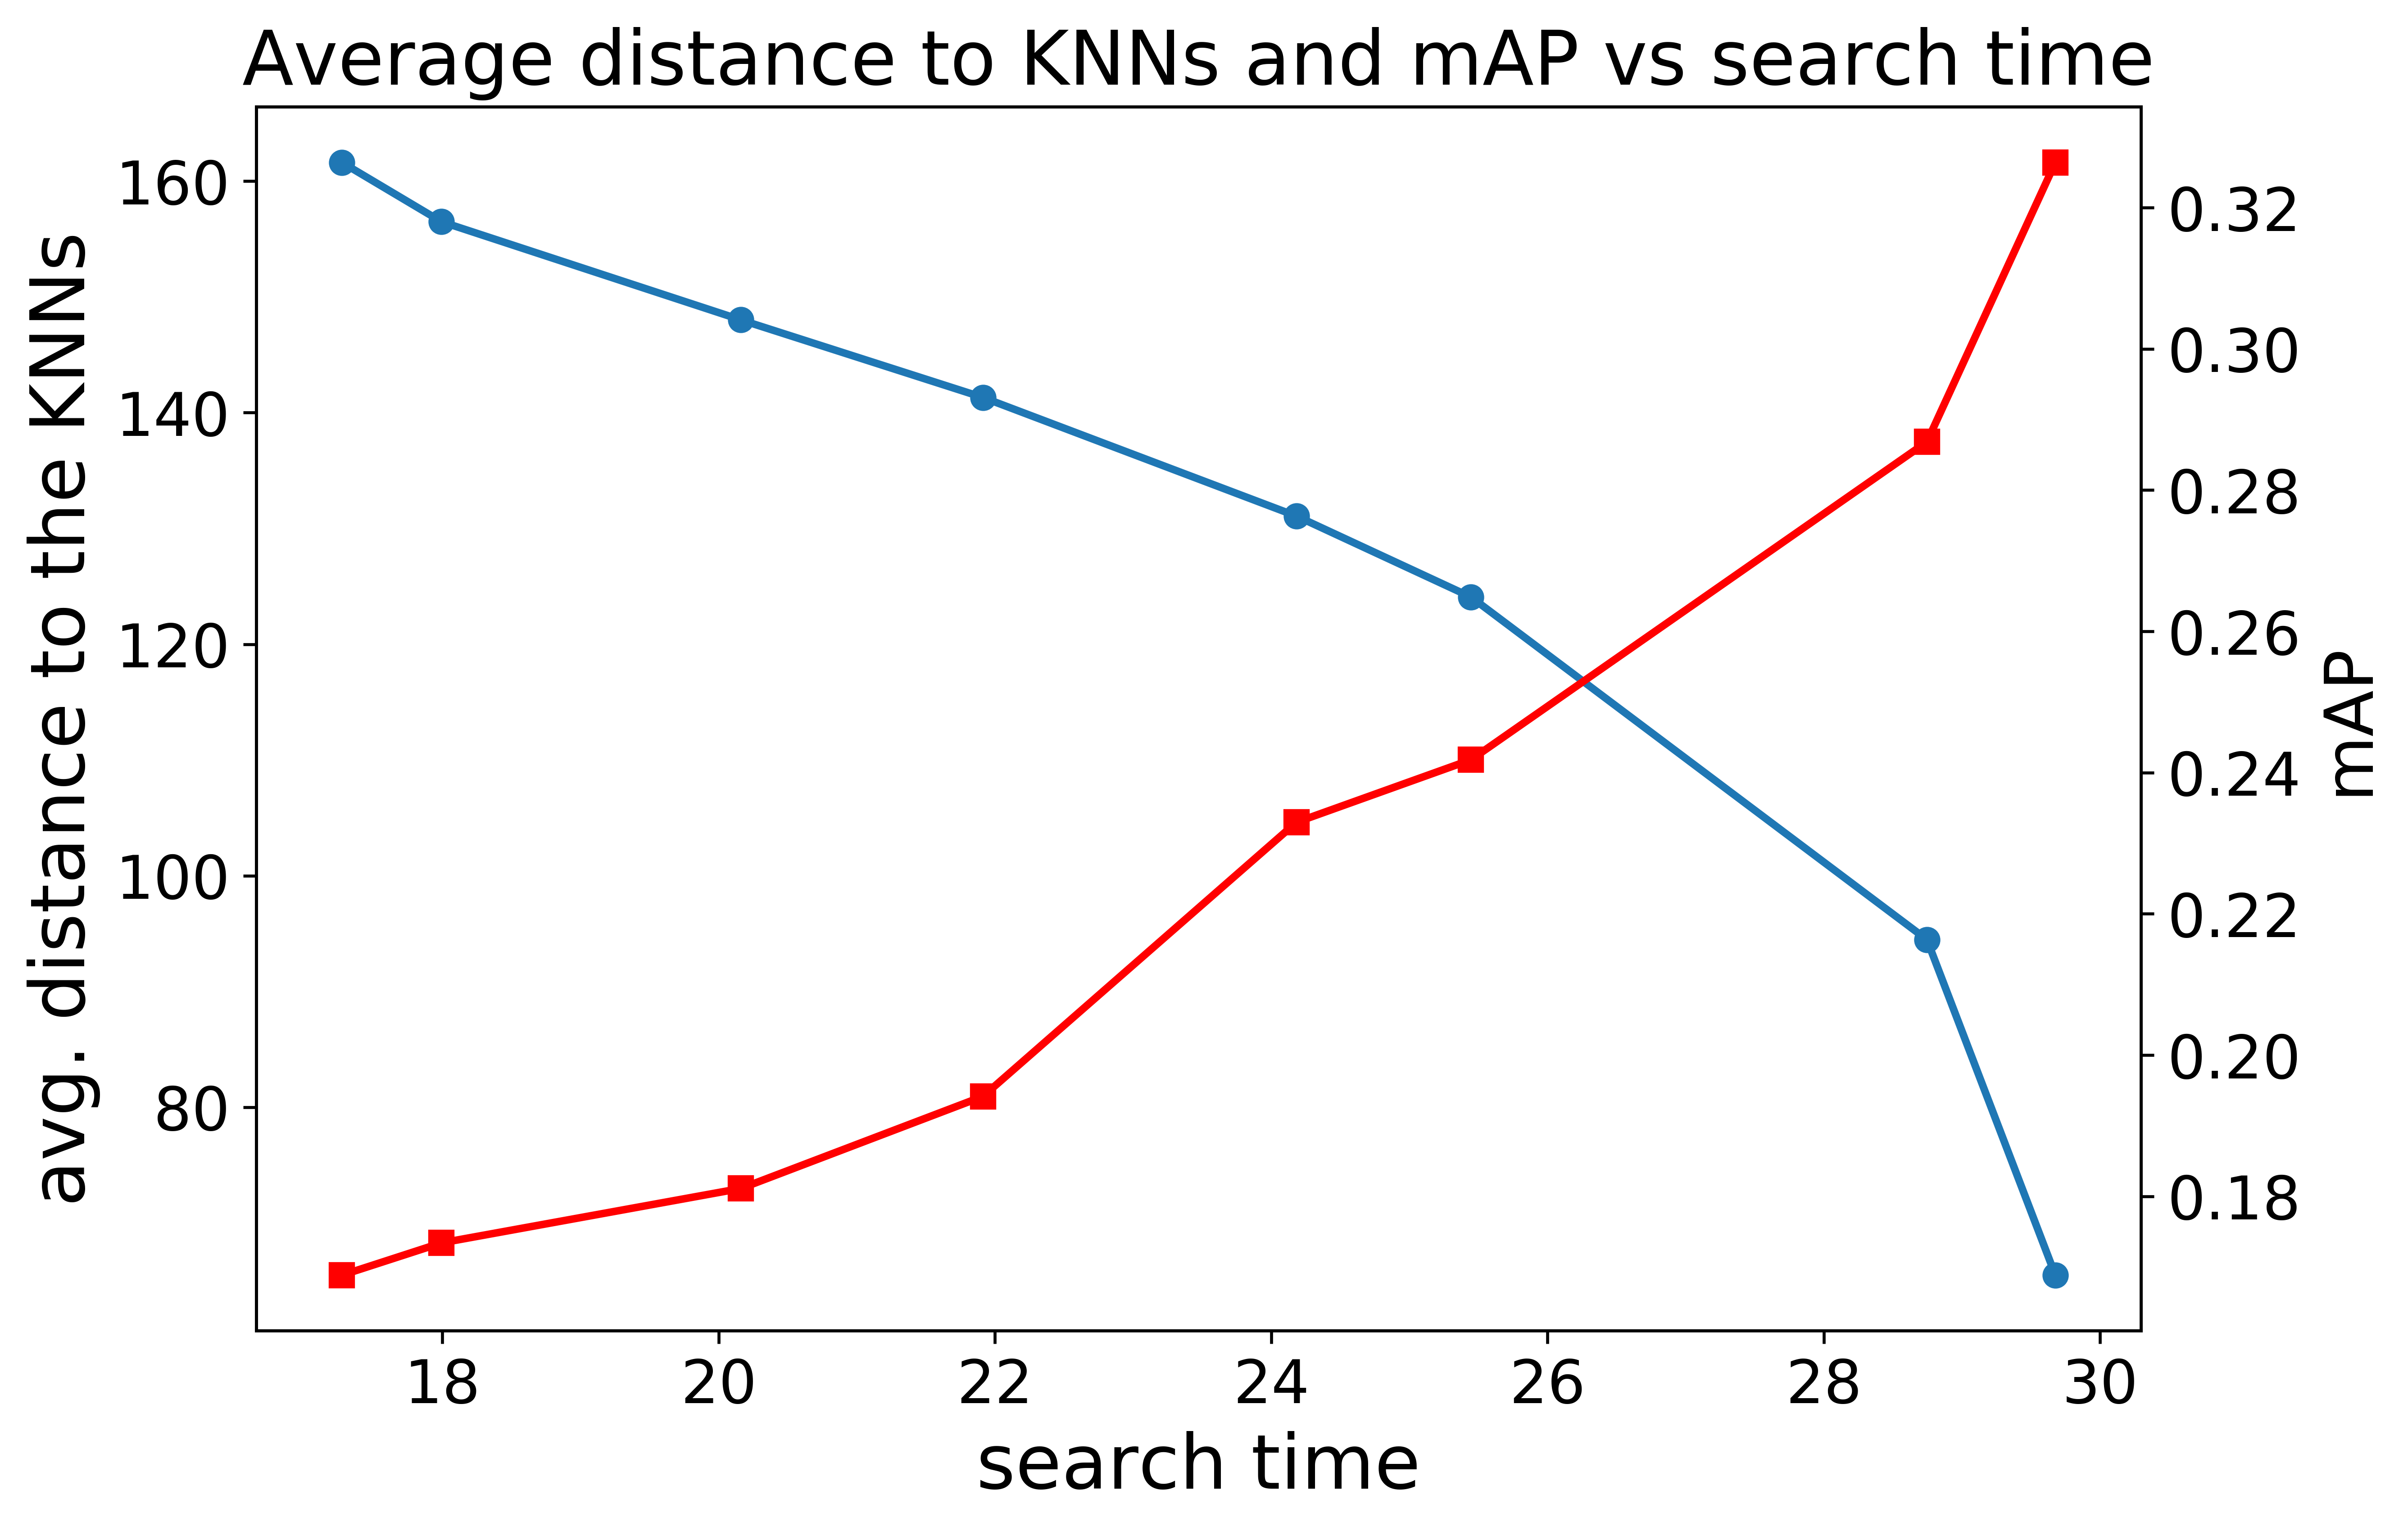

In [60]:
# on the same axes
x_search_time = [tup[2] for tup in data_tuple_list_1]
y_distance = [tup[1] for tup in data_tuple_list_1]
y_mAP = [tup[-1] for tup in data_tuple_list_1]

fig, ax1 = plt.subplots(figsize=(9,6),dpi=600)

ax2 = ax1.twinx()
ax1.plot(x_search_time, y_distance, "o-", linewidth = 2)
ax2.plot(x_search_time, y_mAP, "s-", color= "red" ,linewidth = 2)

plt.title("Average distance to KNNs and mAP vs search time", fontsize = 20)
ax1.set_xlabel("search time", fontsize = 20)
ax1.set_ylabel("avg. distance to the KNNs", fontsize = 20)
ax2.set_ylabel("mAP", fontsize = 18)
ax1.tick_params(axis='both',labelsize=16)
ax2.tick_params(axis='both',labelsize=16)

## Varying K number ##

In [ ]:
'''
Plot mAP vs K (for a fixed setting of hyper-parameters) for different values of K from {10, 50}
k=5
L=3
r=1
C = pow(2, 32) - 5
cR = 150
'''

In [39]:
K_nbs = [3,5,10,15,20,30,40,50]
all_mAPs = [0.24372654212690587, 0.2370860662356682, 0.22735642071063866, 0.22424144995407552, 0.22056062463284748, 0.21896317631077195, 0.21685582258051161, 0.216659730128508]

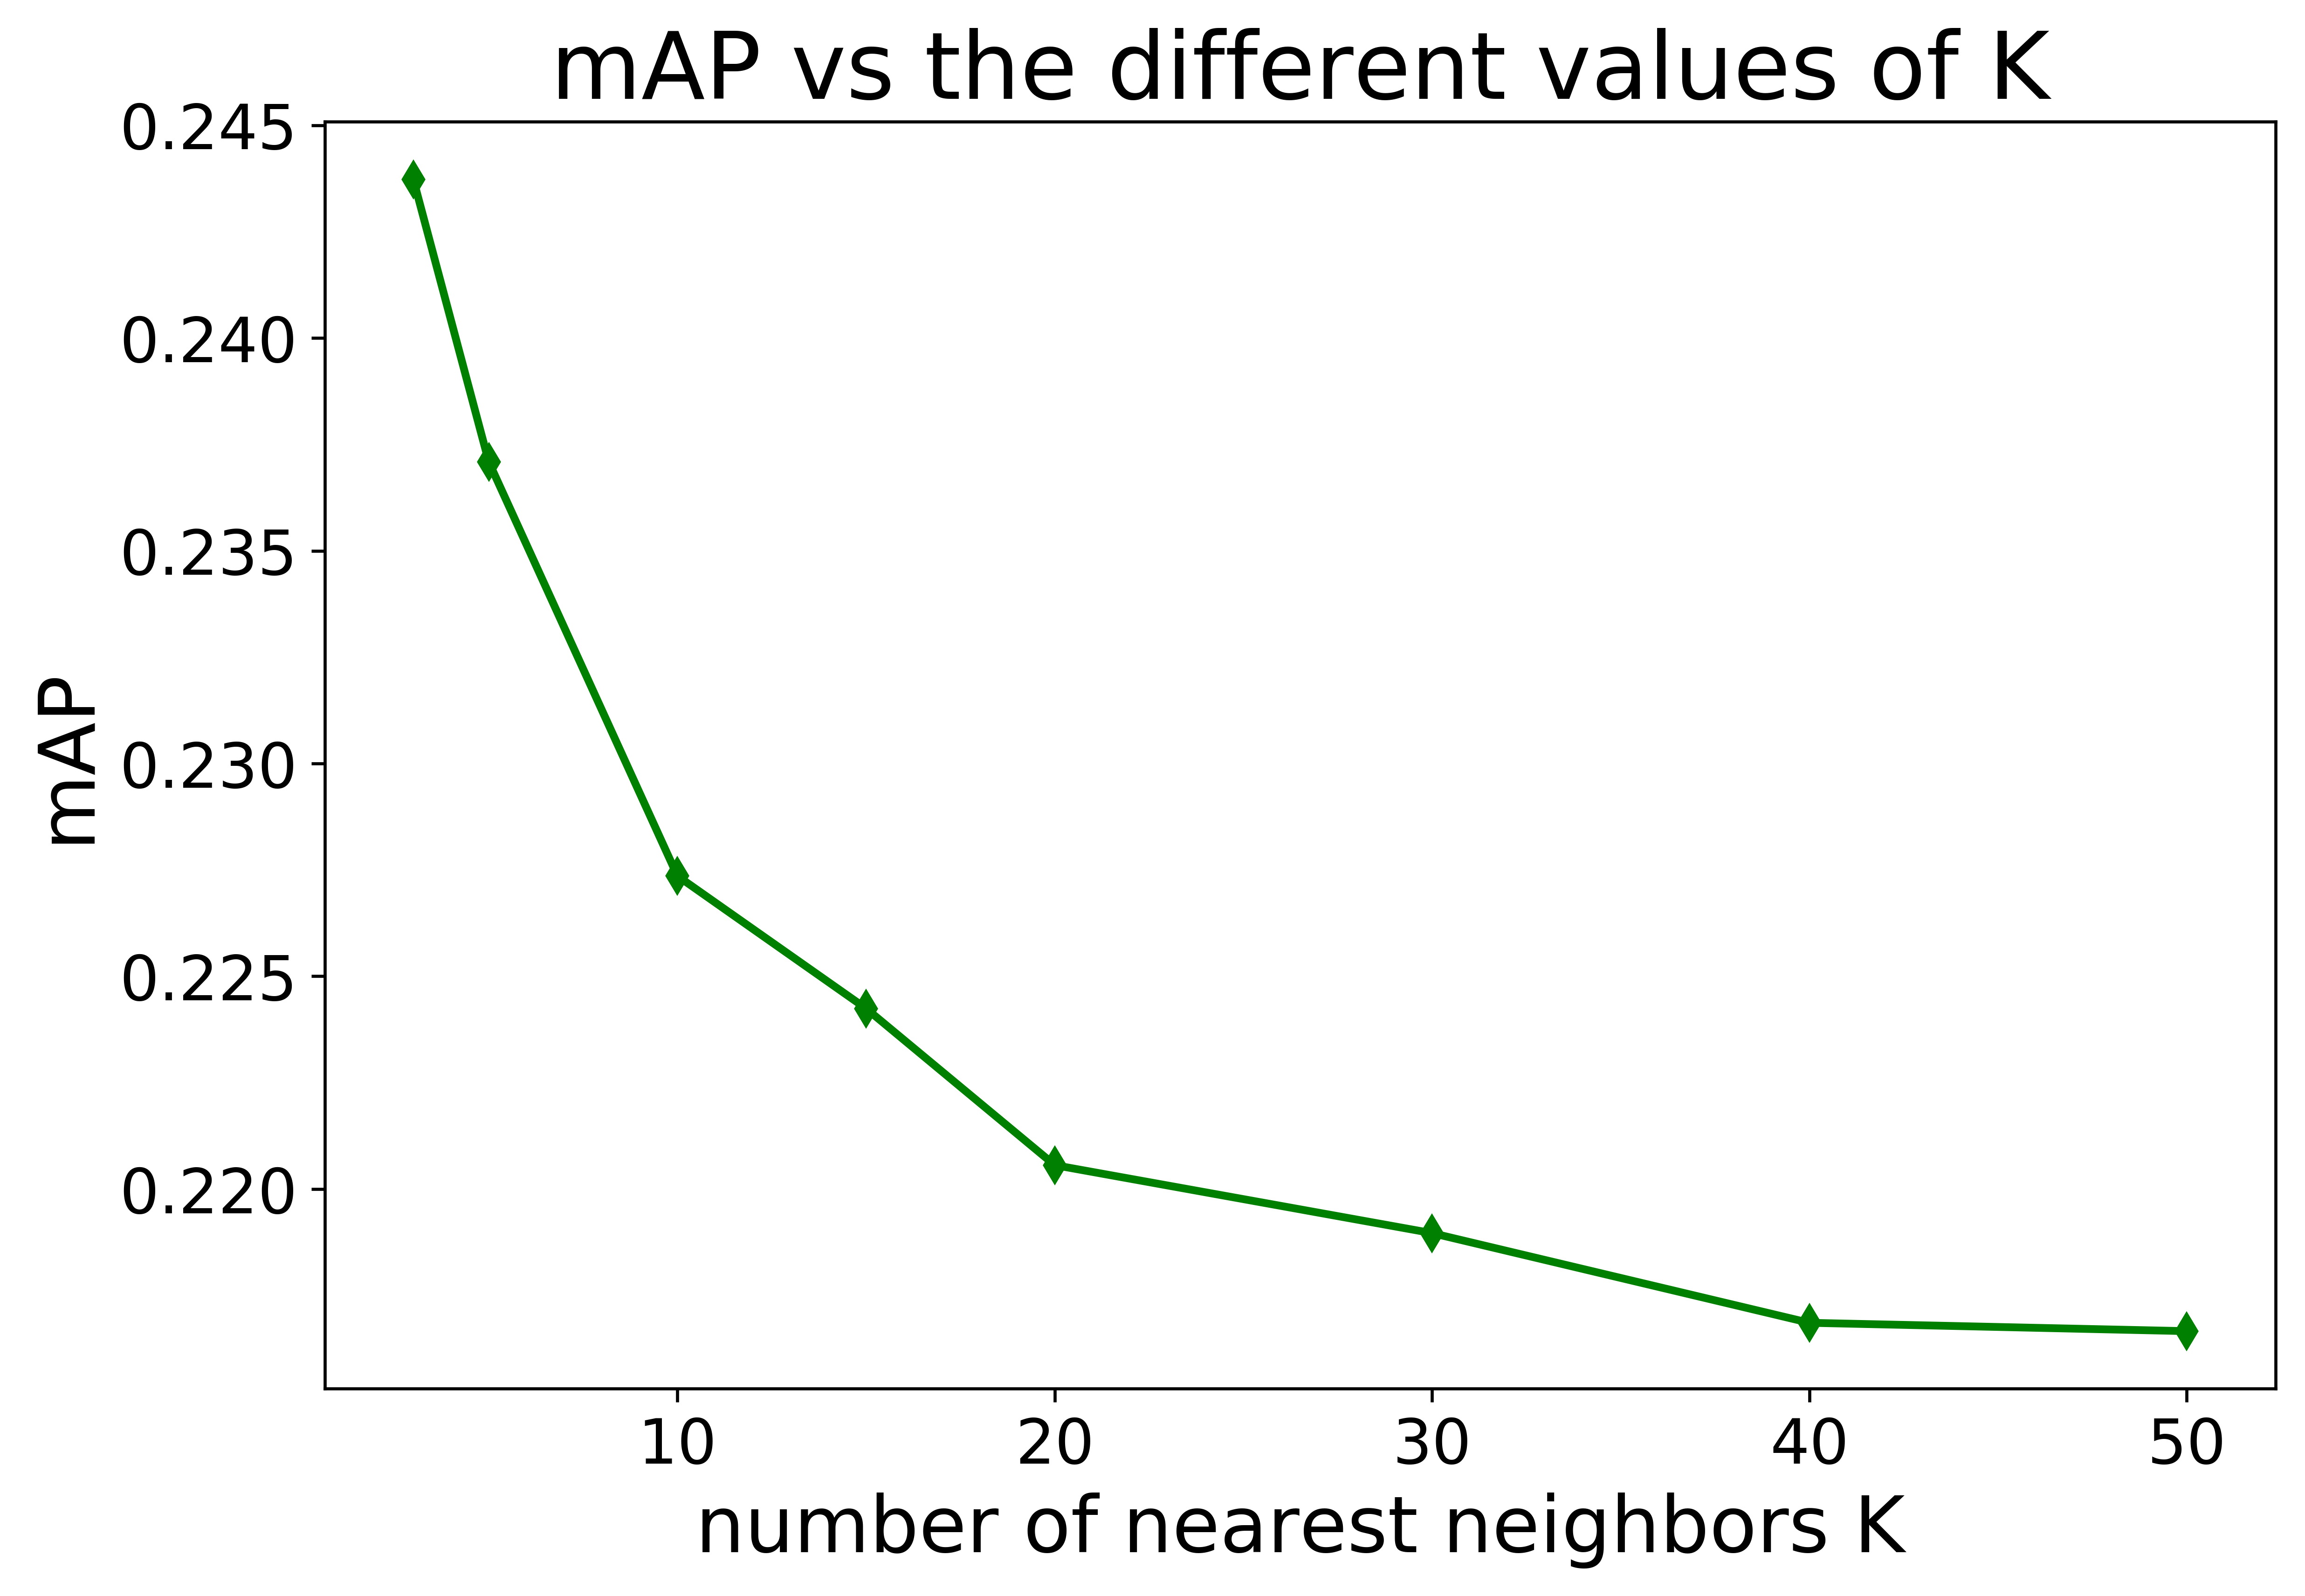

In [59]:
# Plot mAP vs the different values of K
plt.figure(figsize=(9,6),dpi=600)
plt.plot(K_nbs, all_mAPs, "d-", color= "green" ,linewidth = 2)

plt.xlabel("number of nearest neighbors K", fontsize = 20)
plt.ylabel("mAP", fontsize = 20)
plt.title("mAP vs the different values of K", fontsize = 24)
# plt.xlim([0.1,3])
# plt.ylim([2,5])
plt.tick_params(axis='both',labelsize=16)